Matplotlib is building the font cache; this may take a moment.


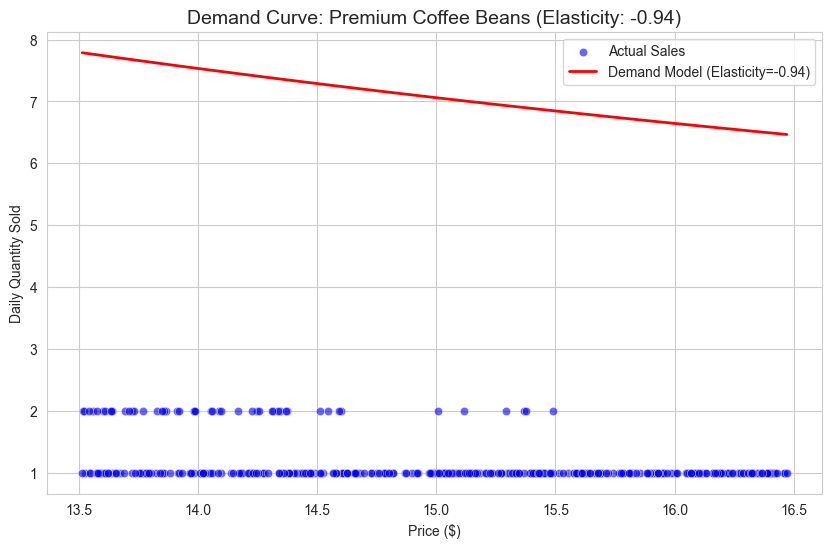

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the generated data and the report
df_trans = pd.read_csv('../data/raw/retail_transactions.csv')
df_report = pd.read_csv('../reports/powerbi_export.csv')

# Set style
sns.set_style("whitegrid")

# PLOT 1: The Demand Curve (Price vs Quantity)
plt.figure(figsize=(10, 6))
sku_to_plot = 101 # Premium Coffee Beans
subset = df_trans[df_trans['sku_id'] == sku_to_plot]

sns.scatterplot(x='price', y='quantity_sold', data=subset, alpha=0.6, color='blue', label='Actual Sales')

# Fit a simple curve for visualization
p_range = np.linspace(subset['price'].min(), subset['price'].max(), 100)
# Get elasticity from report
elast = df_report[df_report['SKU_ID'] == sku_to_plot]['Elasticity'].values[0]
intercept = 4.5 # Approx intercept from our generator
q_pred = np.exp(intercept + elast * np.log(p_range))

plt.plot(p_range, q_pred, color='red', linewidth=2, label=f'Demand Model (Elasticity={elast})')
plt.title(f"Demand Curve: Premium Coffee Beans (Elasticity: {elast})", fontsize=14)
plt.xlabel("Price ($)")
plt.ylabel("Daily Quantity Sold")
plt.legend()
plt.savefig('../reports/demand_curve.png') # Save for Readme
plt.show()



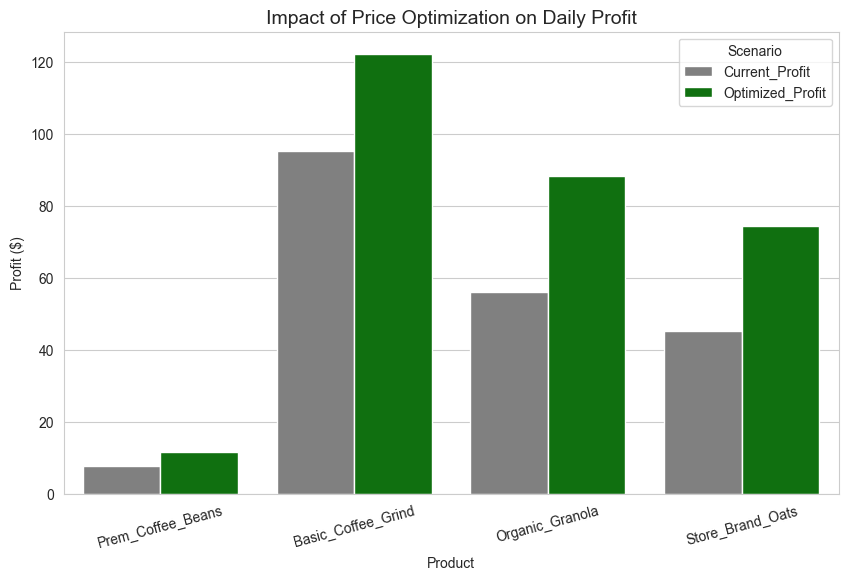

✅ Plots saved to /reports/ folder for your README.


In [2]:
# PLOT 2: Profit Uplift (Before vs After)
plt.figure(figsize=(10, 6))
bar_data = df_report[['Product', 'Current_Profit', 'Optimized_Profit']].melt(
    id_vars='Product', var_name='Scenario', value_name='Daily Profit'
)

sns.barplot(data=bar_data, x='Product', y='Daily Profit', hue='Scenario', palette=['grey', 'green'])
plt.title("Impact of Price Optimization on Daily Profit", fontsize=14)
plt.ylabel("Profit ($)")
plt.xticks(rotation=15)
plt.savefig('../reports/profit_uplift.png') # Save for Readme
plt.show()

print("✅ Plots saved to /reports/ folder for your README.")